<a href="https://colab.research.google.com/github/DarshanPatel0919/Machine-Learning/blob/master/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import numpy as np
import pandas as pd
import random as rd
import pylab as plt
import h5py

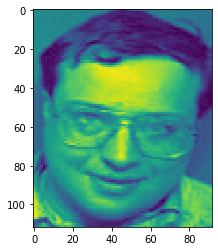

In [0]:
filepath = '/content/gdrive/My Drive/ML/LAB/faceimages.mat'
f = h5py.File(filepath,'r')
keys = list(f.keys())
Xd = np.array(pd.DataFrame(f[keys[2]][:-1]))
H,W = 92,112             # Resolution : 92 * 112

ex = rd.randint(1,Xd.shape[1])

xd = np.array([Xd[:,ex]])       # 1 * 10304

im1=np.reshape(xd,(H,W)).transpose()
plt.imshow(im1)

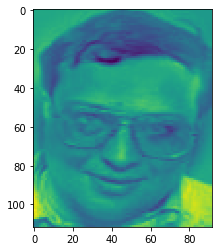

In [0]:
m = np.reshape(np.mean(Xd,axis=1),(len(m),1))
X = Xd - m

x = np.array([X[:,ex]]).transpose()

im1=np.reshape(x,(H,W)).transpose()
plt.imshow(im1)

In [0]:
S = np.cov(X)

In [0]:
vals , A = np.linalg.eig(S)

In [0]:
index = vals.argsort()[::-1]
A = A[:,index].transpose()

In [0]:
y = np.matmul(A,x)
Y = np.matmul(A,X)
At = A.transpose() 

                                  Images without mean




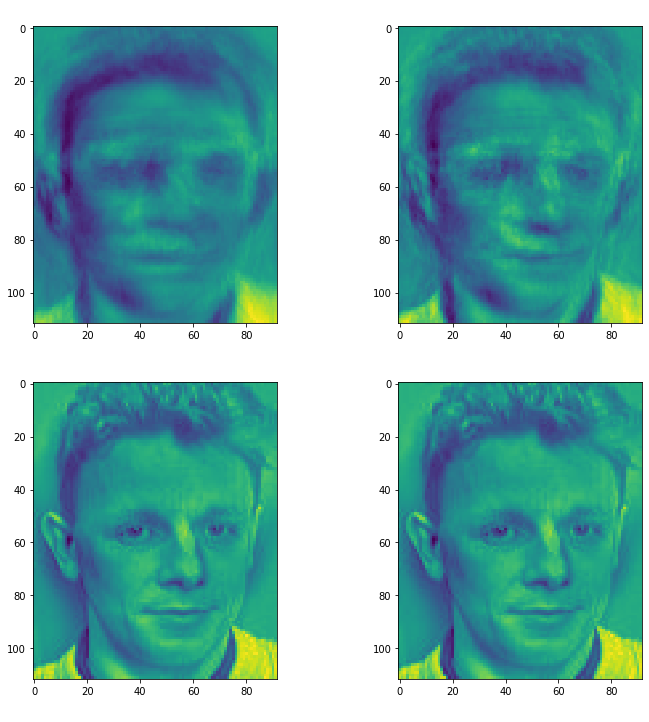

In [0]:

print('                                  Images without mean\n\n')

P = [50,100,400,10304]
scale = 12
fig=plt.figure(figsize=(scale,scale))
X = np.absolute(X)

for i in range(len(P)):
  p = P[i]
  newx = np.real(np.matmul(At[:,:p],y[:p]))
  newX = np.absolute(np.matmul(At[:,:p],Y[:p,:]))
  e = np.mean(np.mean((X - newX)**2))      # Error using norm of difference
  im1=np.reshape(np.real(newx),(H,W)).transpose()
  fig.add_subplot(2, 2, i+1)
  plt.title('p = '+str(p),color='w',fontsize=18)
  plt.xlabel('e = ' +  str(e),color='w',fontsize=16)
  plt.imshow(im1)

plt.show()

                                         Images with mean




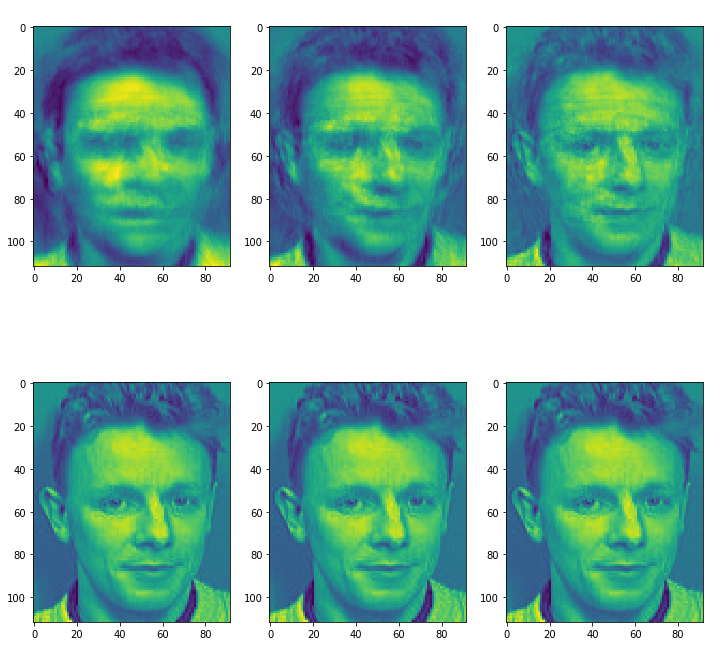

In [0]:

print('                                         Images with mean\n\n')

P = [50,100,200,400,10304]
scale = 12
fig=plt.figure(figsize=(scale,scale))


for i in range(len(P)):
  p = P[i]
  newx = np.real(np.matmul(At[:,:p],y[:p]))
  newX = np.absolute(np.matmul(At[:,:p],Y[:p,:]))
  e = np.mean(np.mean((X - newX)**2))
  im1=np.reshape(newx + m,(H,W)).transpose()
  fig.add_subplot(2, 3, i+1)
  plt.title('p = '+str(p),color='w',fontsize=18)
  plt.xlabel('e = ' +  str(e),color='w',fontsize=16)
  plt.imshow(im1)

im1=np.reshape(x+m,(H,W)).transpose()
fig.add_subplot(2, 3, 6)
plt.title('Original Image',color='w',fontsize=18)
plt.imshow(im1)
plt.show()